# Churn Analysis

Customer Churn is an important and challenging problem for ecomerce and online businesses.

aims:  
    1.    
    2. 

### Import required libraries

In [1]:
import numpy as np
import pandas as pd

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## About the Data

### Read the data

In [5]:
df = pd.read_csv('Churn_Modelling.csv')

### Review the data

In [9]:
df.shape

(10000, 14)

In [13]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

### Clean the data

In [14]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

## Exploratory Data Analysis

In [41]:
amount_retained = df[df['Exited'] == 0]['Exited'].count() / df.shape[0] * 100
amount_lost = df[df['Exited'] == 1]['Exited'].count() / df.shape[0] * 100

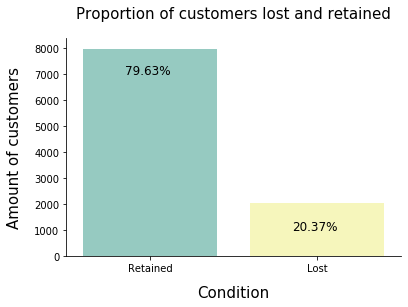

In [50]:
fig, ax = plt.subplots()
sns.countplot(x='Exited', palette="Set3", data=df)
plt.xticks([0, 1], ['Retained', 'Lost'])
plt.xlabel('Condition', size=15, labelpad=12)
plt.ylabel('Amount of customers', size=15, labelpad=12)
plt.title("Proportion of customers lost and retained", size=15, pad=20)
plt.text(-0.15, 7000, f"{round(amount_retained, 2)}%", fontsize=12)
plt.text(0.85, 1000, f"{round(amount_lost, 2)}%", fontsize=12)
sns.despine()
plt.show()